# Logistic Regression Project
In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

'Daily Time Spent on Site': consumer time on site in minutes
'Age': cutomer age in years
'Area Income': Avg. Income of geographical area of consumer
'Daily Internet Usage': Avg. minutes a day consumer is on the internet
'Ad Topic Line': Headline of the advertisement
'City': City of consumer
'Male': Whether or not consumer was male
'Country': Country of consumer
'Timestamp': Time at which consumer clicked on Ad or closed window
'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Importing the libraries

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Importing the dataset

In [135]:
df = pd.read_csv('advertising.csv')


In [136]:
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [137]:
df["Clicked on Ad"].unique()

array([0, 1], dtype=int64)

In [138]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [139]:
df.info

<bound method DataFrame.info of      Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgener

# Exploratory Data Analysis

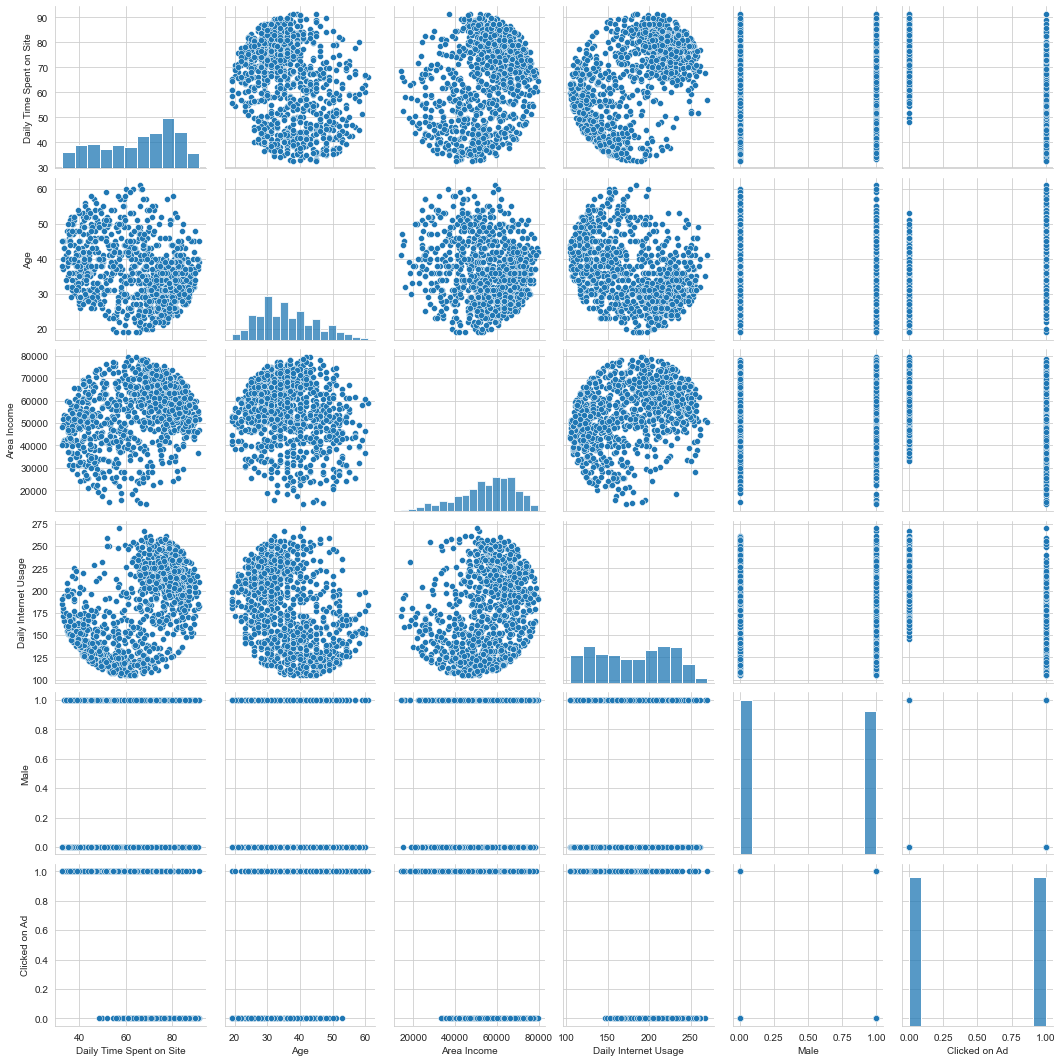

In [140]:
sns.pairplot(df)

[]

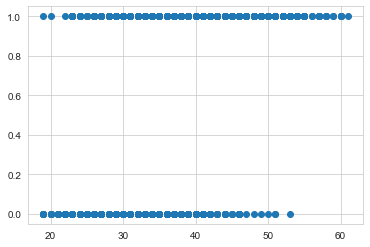

In [141]:
plt.scatter(df['Age'].values, df['Clicked on Ad'].values)
plt.plot()

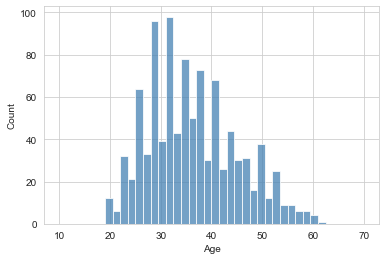

In [142]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(df['Age'],bins=40,binrange=(10,70),color='steelblue')
sns.set_style("whitegrid")

In [143]:
df['Ad_length'] = df['Ad Topic Line'].apply(len)


In [144]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Ad_length
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,34
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,34
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,32
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,37
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,29
...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,29
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,31
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,28
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,36


In [145]:
country_dict = df.groupby('Country')['Clicked on Ad'].mean().to_dict()
df['Country_encode'] = df['Country'].map(country_dict)


In [146]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Ad_length,Country_encode
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,34,0.250000
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,34,0.333333
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,32,0.333333
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,37,0.200000
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,29,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,29,0.666667
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,31,0.428571
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,28,0.666667
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,36,0.750000


In [147]:
df['Month'] = pd.to_datetime(df['Timestamp']).dt.month


In [148]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Ad_length,Country_encode,Month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,34,0.250000,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,34,0.333333,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,32,0.333333,3
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,37,0.200000,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,29,0.333333,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,29,0.666667,2
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,31,0.428571,4
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,28,0.666667,2
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,36,0.750000,3


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = [0, 1, 2, 3, 6, 10, 11, 12]
df.iloc[:, columns_to_scale] = scaler.fit_transform(df.iloc[:, columns_to_scale])


In [149]:
X = df.iloc[:, [0, 1, 2, 3, 6, 10, 11, 12]].values
y = df['Clicked on Ad'].tolist()

In [150]:
X

array([[6.89500000e+01, 3.50000000e+01, 6.18339000e+04, ...,
        3.40000000e+01, 2.50000000e-01, 3.00000000e+00],
       [8.02300000e+01, 3.10000000e+01, 6.84418500e+04, ...,
        3.40000000e+01, 3.33333333e-01, 4.00000000e+00],
       [6.94700000e+01, 2.60000000e+01, 5.97859400e+04, ...,
        3.20000000e+01, 3.33333333e-01, 3.00000000e+00],
       ...,
       [5.16300000e+01, 5.10000000e+01, 4.24157200e+04, ...,
        2.80000000e+01, 6.66666667e-01, 2.00000000e+00],
       [5.55500000e+01, 1.90000000e+01, 4.19207900e+04, ...,
        3.60000000e+01, 7.50000000e-01, 3.00000000e+00],
       [4.50100000e+01, 2.60000000e+01, 2.98758000e+04, ...,
        3.10000000e+01, 6.00000000e-01, 6.00000000e+00]])

In [151]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,


## Splitting the dataset into the Training set and Test set

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [153]:
print(X_train)

[[7.407000e+01 2.200000e+01 5.095024e+04 ... 3.700000e+01 5.000000e-01
  3.000000e+00]
 [3.700000e+01 4.800000e+01 3.678238e+04 ... 4.500000e+01 1.000000e+00
  3.000000e+00]
 [3.598000e+01 4.500000e+01 4.324188e+04 ... 3.800000e+01 1.000000e+00
  6.000000e+00]
 ...
 [6.311000e+01 3.400000e+01 6.310788e+04 ... 3.400000e+01 5.000000e-01
  3.000000e+00]
 [5.656000e+01 2.600000e+01 6.878345e+04 ... 2.800000e+01 5.000000e-01
  2.000000e+00]
 [4.661000e+01 4.200000e+01 6.585674e+04 ... 3.500000e+01 1.000000e+00
  1.000000e+00]]


In [154]:
print(y_train)

[0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 

In [155]:
print(X_test)

[[6.22000000e+01 2.50000000e+01 2.54082100e+04 ... 3.50000000e+01
  1.00000000e+00 4.00000000e+00]
 [7.95400000e+01 4.40000000e+01 7.04926000e+04 ... 3.30000000e+01
  2.85714286e-01 1.00000000e+00]
 [6.17200000e+01 2.60000000e+01 6.72790600e+04 ... 3.10000000e+01
  4.28571429e-01 2.00000000e+00]
 ...
 [4.74800000e+01 3.10000000e+01 2.93592000e+04 ... 3.40000000e+01
  4.28571429e-01 6.00000000e+00]
 [8.71400000e+01 3.10000000e+01 5.82352100e+04 ... 3.00000000e+01
  2.00000000e-01 5.00000000e+00]
 [5.90500000e+01 5.20000000e+01 5.00861700e+04 ... 3.30000000e+01
  1.00000000e+00 4.00000000e+00]]


In [156]:
print(y_test)

[1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1]


In [157]:
print(X_train)

[[7.407000e+01 2.200000e+01 5.095024e+04 ... 3.700000e+01 5.000000e-01
  3.000000e+00]
 [3.700000e+01 4.800000e+01 3.678238e+04 ... 4.500000e+01 1.000000e+00
  3.000000e+00]
 [3.598000e+01 4.500000e+01 4.324188e+04 ... 3.800000e+01 1.000000e+00
  6.000000e+00]
 ...
 [6.311000e+01 3.400000e+01 6.310788e+04 ... 3.400000e+01 5.000000e-01
  3.000000e+00]
 [5.656000e+01 2.600000e+01 6.878345e+04 ... 2.800000e+01 5.000000e-01
  2.000000e+00]
 [4.661000e+01 4.200000e+01 6.585674e+04 ... 3.500000e+01 1.000000e+00
  1.000000e+00]]


In [158]:
print(X_test)

[[6.22000000e+01 2.50000000e+01 2.54082100e+04 ... 3.50000000e+01
  1.00000000e+00 4.00000000e+00]
 [7.95400000e+01 4.40000000e+01 7.04926000e+04 ... 3.30000000e+01
  2.85714286e-01 1.00000000e+00]
 [6.17200000e+01 2.60000000e+01 6.72790600e+04 ... 3.10000000e+01
  4.28571429e-01 2.00000000e+00]
 ...
 [4.74800000e+01 3.10000000e+01 2.93592000e+04 ... 3.40000000e+01
  4.28571429e-01 6.00000000e+00]
 [8.71400000e+01 3.10000000e+01 5.82352100e+04 ... 3.00000000e+01
  2.00000000e-01 5.00000000e+00]
 [5.90500000e+01 5.20000000e+01 5.00861700e+04 ... 3.30000000e+01
  1.00000000e+00 4.00000000e+00]]


## Training the Logistic Regression model on the Training set

In [159]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 10)
classifier.fit(X_train, y_train)

C:\Users\Tipu Sultan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

## Predicting a new result

## Predicting the Test set results

In [160]:
y_pred = classifier.predict(X_test)
y_test_array = np.array(y_test)
predictions = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test_array.reshape(len(y_test_array), 1)), axis=1)
print(predictions)


[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]

## Making the Confusion Matrix

In [161]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[114   5]
 [ 12 119]]


0.932

<AxesSubplot:>

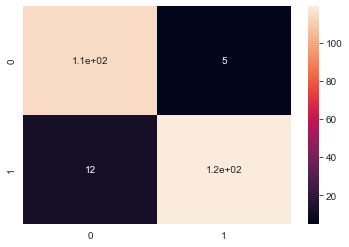

In [162]:
sns.heatmap(cm, annot= True)

In [163]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       119
           1       0.96      0.91      0.93       131

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



In [164]:
y_score = classifier.predict_proba(X_test)
y_score

array([[4.01474167e-01, 5.98525833e-01],
       [7.67236421e-01, 2.32763579e-01],
       [9.72638187e-01, 2.73618128e-02],
       [1.80006400e-03, 9.98199936e-01],
       [3.01090779e-01, 6.98909221e-01],
       [1.90587570e-02, 9.80941243e-01],
       [5.43014201e-01, 4.56985799e-01],
       [7.97111237e-02, 9.20288876e-01],
       [2.00305536e-01, 7.99694464e-01],
       [9.53812827e-01, 4.61871734e-02],
       [1.40892808e-02, 9.85910719e-01],
       [9.61129247e-01, 3.88707526e-02],
       [8.76803632e-03, 9.91231964e-01],
       [8.52460333e-01, 1.47539667e-01],
       [9.97178020e-01, 2.82197969e-03],
       [9.32949829e-01, 6.70501706e-02],
       [8.81714996e-01, 1.18285004e-01],
       [1.69227579e-05, 9.99983077e-01],
       [9.93786653e-02, 9.00621335e-01],
       [9.70856180e-01, 2.91438202e-02],
       [9.99096998e-02, 9.00090300e-01],
       [3.51774692e-03, 9.96482253e-01],
       [9.86613312e-01, 1.33866884e-02],
       [9.98735260e-01, 1.26473998e-03],
       [5.273086

In [165]:
y_score = classifier.predict_proba(X_test)[:,1]
y_score

array([0.59852583, 0.23276358, 0.02736181, 0.99819994, 0.69890922,
       0.98094124, 0.4569858 , 0.92028888, 0.79969446, 0.04618717,
       0.98591072, 0.03887075, 0.99123196, 0.14753967, 0.00282198,
       0.06705017, 0.118285  , 0.99998308, 0.90062133, 0.02914382,
       0.9000903 , 0.99648225, 0.01338669, 0.00126474, 0.94726914,
       0.01192964, 0.03031881, 0.99582356, 0.49867875, 0.96626239,
       0.75766578, 0.98710331, 0.01982098, 0.50258283, 0.03822991,
       0.99943233, 0.01677696, 0.03246987, 0.99821316, 0.97968955,
       0.57134607, 0.01754935, 0.06119038, 0.15149502, 0.18859278,
       0.01209333, 0.98456652, 0.94340261, 0.11342554, 0.04721548,
       0.07953748, 0.87058324, 0.80114392, 0.04360046, 0.95243377,
       0.00812151, 0.28804663, 0.0103169 , 0.99313244, 0.19195401,
       0.07245001, 0.98661481, 0.01367458, 0.95132497, 0.0143166 ,
       0.99257683, 0.00916821, 0.64591288, 0.90712983, 0.99761853,
       0.02055311, 0.98515844, 0.04808475, 0.99631745, 0.01498

In [166]:
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Ad_length,Country_encode,Month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,34,0.250000,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,34,0.333333,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,32,0.333333,3


In [167]:
from sklearn.metrics import classification_report
target_name = ['Age', 'Area Income','Daily Internet Usage','Male','Ad_length','Country_encode','Month']

In [168]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       119
           1       0.96      0.91      0.93       131

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



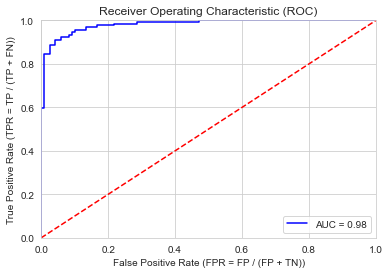

In [171]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title("Receiver Operating Characteristic (ROC)")
plt.plot(false_positive_rate, true_positive_rate, 'b', label="AUC = %.2f" % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate (TPR = TP / (TP + FN))")
plt.xlabel("False Positive Rate (FPR = FP / (FP + TN))")
plt.show()


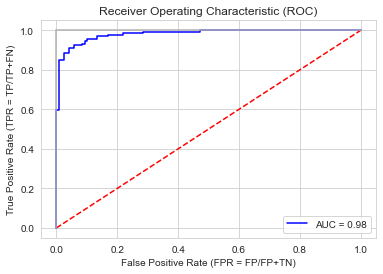

In [172]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Assuming you have defined `y_test` and `y_score` appropriately

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)

plt.title("Receiver Operating Characteristic (ROC)")
plt.plot(false_positive_rate, true_positive_rate, 'b', label="AUC = %0.2f" % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.plot([0, 0], [1, 0], c=".7")
plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate (TPR = TP/TP+FN)")
plt.xlabel("False Positive Rate (FPR = FP/FP+TN)")
plt.show()


In [173]:
print("Estimate Intercept: ", classifier.intercept_)

Estimate Intercept:  [0.00900176]


In [174]:
print("Number of Coefficient : ", len(classifier.coef_))
print("Coficients : ", classifier.coef_)


Number of Coefficient :  1
Coficients :  [[-1.03351331e-01  2.20944370e-01 -4.23091568e-05 -2.82646183e-02
   3.73533951e-03  1.93684585e-01  1.27013326e-02  3.34080738e-02]]


In [175]:
import statsmodels.api as sm

In [176]:
model = sm.Logit(y_train, X_train)

In [177]:
output = model.fit()

Optimization terminated successfully.
         Current function value: 0.126936
         Iterations 9


In [178]:
print(output.summary2())

                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.817      
Dependent Variable: y                AIC:              206.4045   
Date:               2023-06-13 23:08 BIC:              243.3651   
No. Observations:   750              Log-Likelihood:   -95.202    
Df Model:           7                LL-Null:          -519.76    
Df Residuals:       742              LLR p-value:      4.6328e-179
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     9.0000                                        
---------------------------------------------------------------------
        Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
---------------------------------------------------------------------
x1     -0.1140      0.0164    -6.9647    0.0000    -0.1461    -0.0819
x2      0.2172      0.0268     8.0970    0.0000     0.1646     0.2698
x3     -0.0001      0.0000    -4.8138    0.0000    -0.0001    -0.0000
x4 

## Visualising the Training set results

## Visualising the Test set results